In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [3]:
def df_to_X_y(df, window_size=7):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [4]:
df=pd.read_excel(r'C:\Users\ved14\OneDrive\Desktop\extracurriculars\ForecastPro\data\AirQualityUCI.xlsx')
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


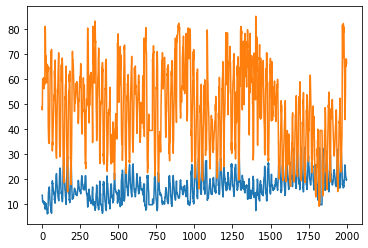

In [5]:
df['NOx(GT)'].replace(-200,df['NOx(GT)'].mean(),inplace=True)
df['T'].replace(-200,df['T'].mean(),inplace=True)
df['RH'].replace(-200,df['RH'].mean(),inplace=True)
df['T'].iloc[:2000].plot()
df['RH'].iloc[:2000].plot()
plt.show()

In [6]:
X=np.array(df[['T','RH']])
X

array([[13.5999999 , 48.87500095],
       [13.29999995, 47.69999981],
       [11.9000001 , 53.97500038],
       ...,
       [26.89999962, 18.34999967],
       [28.32499981, 13.54999995],
       [28.50000048, 13.125     ]])

In [27]:
time_steps=7
n_series=2

model2 = Sequential()
model2.add(InputLayer((time_steps, n_series)))
model2.add(Conv1D(32, kernel_size=2)),
model2.add(LSTM(64))
#model2.add(Flatten())
model2.add(Dense(32, 'relu'))
model2.add(Dense(16,'relu'))
model2.add(Dense(n_series, 'linear'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 6, 32)             160       
                                                                 
 lstm_1 (LSTM)               (None, 64)                24832     
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 2)                 34        
                                                                 
Total params: 27,634
Trainable params: 27,634
Non-trainable params: 0
_________________________________________________________________


In [28]:
X,y=df_to_X_y(df[['T','RH']],window_size=time_steps)
X=X.reshape(-1,time_steps,2)

In [29]:
X=X.reshape(-1,time_steps,2)

In [30]:
X_train=X[:3000]
y_train=y[:3000]
X_test=X[3000:4000]
y_test=y[3000:4000]

In [31]:
cp1 = ModelCheckpoint('model2/', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0008), metrics=[RootMeanSquaredError()])
history=model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, callbacks=[cp1])

Epoch 1/30


89/94 [===========================>..] - ETA: 0s - loss: 778.0302 - root_mean_squared_error: 27.8932

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


94/94 [==============================] - 7s 56ms/step - loss: 747.9493 - root_mean_squared_error: 27.3487 - val_loss: 209.6378 - val_root_mean_squared_error: 14.4789
Epoch 2/30
87/94 [==========================>...] - ETA: 0s - loss: 85.9025 - root_mean_squared_error: 9.2684

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


94/94 [==============================] - 5s 52ms/step - loss: 83.4430 - root_mean_squared_error: 9.1347 - val_loss: 80.0311 - val_root_mean_squared_error: 8.9460
Epoch 3/30
92/94 [============================>.] - ETA: 0s - loss: 28.1219 - root_mean_squared_error: 5.3030

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


94/94 [==============================] - 5s 55ms/step - loss: 27.9321 - root_mean_squared_error: 5.2851 - val_loss: 28.8609 - val_root_mean_squared_error: 5.3722
Epoch 4/30
87/94 [==========================>...] - ETA: 0s - loss: 16.0552 - root_mean_squared_error: 4.0069

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


94/94 [==============================] - 4s 47ms/step - loss: 16.0366 - root_mean_squared_error: 4.0046 - val_loss: 20.9670 - val_root_mean_squared_error: 4.5790
Epoch 5/30
88/94 [===========================>..] - ETA: 0s - loss: 13.1979 - root_mean_squared_error: 3.6329

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


94/94 [==============================] - 4s 47ms/step - loss: 13.0768 - root_mean_squared_error: 3.6162 - val_loss: 13.9206 - val_root_mean_squared_error: 3.7310
Epoch 6/30
94/94 [==============================] - ETA: 0s - loss: 11.6145 - root_mean_squared_error: 3.4080

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


94/94 [==============================] - 4s 42ms/step - loss: 11.6145 - root_mean_squared_error: 3.4080 - val_loss: 12.1693 - val_root_mean_squared_error: 3.4885
Epoch 7/30
89/94 [===========================>..] - ETA: 0s - loss: 11.5966 - root_mean_squared_error: 3.4054

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


94/94 [==============================] - 4s 48ms/step - loss: 11.5705 - root_mean_squared_error: 3.4015 - val_loss: 10.7007 - val_root_mean_squared_error: 3.2712
Epoch 8/30
86/94 [==========================>...] - ETA: 0s - loss: 11.5952 - root_mean_squared_error: 3.4052

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


94/94 [==============================] - 4s 44ms/step - loss: 11.3805 - root_mean_squared_error: 3.3735 - val_loss: 10.5318 - val_root_mean_squared_error: 3.2453
Epoch 9/30
94/94 [==============================] - 1s 7ms/step - loss: 10.6789 - root_mean_squared_error: 3.2679 - val_loss: 11.9948 - val_root_mean_squared_error: 3.4634
Epoch 10/30
93/94 [============================>.] - ETA: 0s - loss: 11.0433 - root_mean_squared_error: 3.3232

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


94/94 [==============================] - 5s 49ms/step - loss: 11.0939 - root_mean_squared_error: 3.3307 - val_loss: 10.5134 - val_root_mean_squared_error: 3.2424
Epoch 11/30
86/94 [==========================>...] - ETA: 0s - loss: 10.7474 - root_mean_squared_error: 3.2783

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


94/94 [==============================] - 4s 48ms/step - loss: 10.6354 - root_mean_squared_error: 3.2612 - val_loss: 10.4854 - val_root_mean_squared_error: 3.2381
Epoch 12/30
94/94 [==============================] - 1s 8ms/step - loss: 10.4213 - root_mean_squared_error: 3.2282 - val_loss: 12.3593 - val_root_mean_squared_error: 3.5156
Epoch 13/30
90/94 [===========================>..] - ETA: 0s - loss: 10.4876 - root_mean_squared_error: 3.2385

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


94/94 [==============================] - 4s 45ms/step - loss: 10.5495 - root_mean_squared_error: 3.2480 - val_loss: 10.3372 - val_root_mean_squared_error: 3.2152
Epoch 14/30
94/94 [==============================] - 1s 7ms/step - loss: 10.2239 - root_mean_squared_error: 3.1975 - val_loss: 10.3766 - val_root_mean_squared_error: 3.2213
Epoch 15/30
94/94 [==============================] - 1s 7ms/step - loss: 10.3839 - root_mean_squared_error: 3.2224 - val_loss: 12.1885 - val_root_mean_squared_error: 3.4912
Epoch 16/30
93/94 [============================>.] - ETA: 0s - loss: 10.2533 - root_mean_squared_error: 3.2021

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


94/94 [==============================] - 5s 50ms/step - loss: 10.2472 - root_mean_squared_error: 3.2011 - val_loss: 9.9462 - val_root_mean_squared_error: 3.1538
Epoch 17/30
94/94 [==============================] - 1s 7ms/step - loss: 10.0305 - root_mean_squared_error: 3.1671 - val_loss: 10.0150 - val_root_mean_squared_error: 3.1647
Epoch 18/30
94/94 [==============================] - 1s 7ms/step - loss: 10.1290 - root_mean_squared_error: 3.1826 - val_loss: 10.2079 - val_root_mean_squared_error: 3.1950
Epoch 19/30
94/94 [==============================] - 1s 8ms/step - loss: 10.2571 - root_mean_squared_error: 3.2027 - val_loss: 10.4651 - val_root_mean_squared_error: 3.2350
Epoch 20/30
87/94 [==========================>...] - ETA: 0s - loss: 9.9745 - root_mean_squared_error: 3.1582

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


94/94 [==============================] - 4s 45ms/step - loss: 9.9171 - root_mean_squared_error: 3.1491 - val_loss: 9.9445 - val_root_mean_squared_error: 3.1535
Epoch 21/30
93/94 [============================>.] - ETA: 0s - loss: 10.1788 - root_mean_squared_error: 3.1904

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


94/94 [==============================] - 5s 49ms/step - loss: 10.2831 - root_mean_squared_error: 3.2067 - val_loss: 9.8456 - val_root_mean_squared_error: 3.1378
Epoch 22/30
91/94 [============================>.] - ETA: 0s - loss: 10.0571 - root_mean_squared_error: 3.1713

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


94/94 [==============================] - 4s 44ms/step - loss: 10.1093 - root_mean_squared_error: 3.1795 - val_loss: 9.7933 - val_root_mean_squared_error: 3.1294
Epoch 23/30
93/94 [============================>.] - ETA: 0s - loss: 9.9242 - root_mean_squared_error: 3.1503

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


94/94 [==============================] - 5s 49ms/step - loss: 9.9431 - root_mean_squared_error: 3.1533 - val_loss: 9.7656 - val_root_mean_squared_error: 3.1250
Epoch 24/30
94/94 [==============================] - 1s 8ms/step - loss: 10.2843 - root_mean_squared_error: 3.2069 - val_loss: 10.6675 - val_root_mean_squared_error: 3.2661
Epoch 25/30
94/94 [==============================] - 1s 8ms/step - loss: 10.1023 - root_mean_squared_error: 3.1784 - val_loss: 9.7966 - val_root_mean_squared_error: 3.1300
Epoch 26/30
94/94 [==============================] - 1s 9ms/step - loss: 9.8482 - root_mean_squared_error: 3.1382 - val_loss: 11.0630 - val_root_mean_squared_error: 3.3261
Epoch 27/30
94/94 [==============================] - 1s 8ms/step - loss: 9.8977 - root_mean_squared_error: 3.1461 - val_loss: 9.7888 - val_root_mean_squared_error: 3.1287
Epoch 28/30
94/94 [==============================] - 1s 9ms/step - loss: 10.0416 - root_mean_squared_error: 3.1689 - val_loss: 9.8826 - val_root_mean_sq

In [32]:
preds=model2.predict(X_test
               )

32/32 [==============================] - 0s 3ms/step


In [33]:
plt.style.use('fivethirtyeight')

32/32 [==============================] - 0s 3ms/step


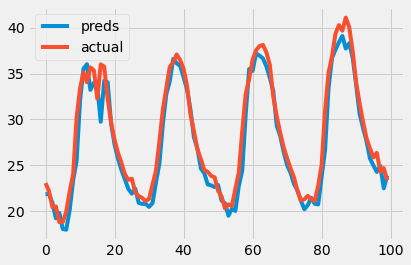

In [34]:
preds=model2.predict(X_test)
plt.plot(preds[:100,0],label='preds')
plt.plot(y_test[:100,0], label='actual')
plt.legend()
plt.show()

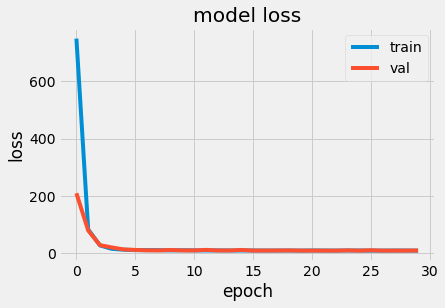

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [36]:
forecast_steps=10
last_batch=X_test[len(y_test)-time_steps:]
forecast=[]
for step in range(forecast_steps):
    pred=model2.predict(np.array(X_test[step]).reshape(1,time_steps,n_series))
    forecast.append(pred)
    last_batch=np.append(last_batch[1:],pred)
forecast=np.array(forecast)
final_forecast=forecast.reshape(forecast_steps,n_series)
final_forecast

1/1 [==============================] - 0s 18ms/step


array([[21.833357, 39.42821 ],
       [21.854668, 37.83358 ],
       [20.883745, 43.41467 ],
       [19.204275, 47.81254 ],
       [19.789488, 45.5656  ],
       [18.028345, 53.328163],
       [17.958265, 51.59789 ],
       [20.110384, 46.608482],
       [23.361559, 39.119934],
       [25.467892, 32.758083]], dtype=float32)

In [37]:
model2.predict(X_test[0].reshape(1,time_steps,n_series))

1/1 [==============================] - 0s 20ms/step


array([[21.833357, 39.42821 ]], dtype=float32)

In [38]:
final_forecast=final_forecast.reshape(forecast_steps,n_series)

<AxesSubplot:>

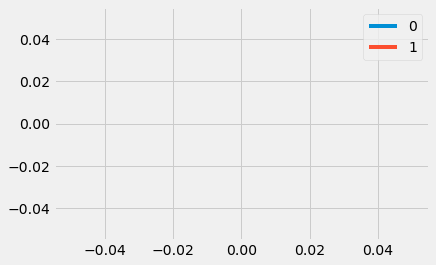

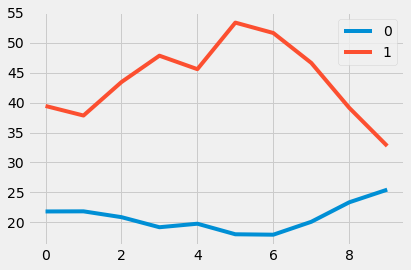

In [39]:
pd.DataFrame(y_test).iloc[7600:].plot()
pd.DataFrame(final_forecast).plot()

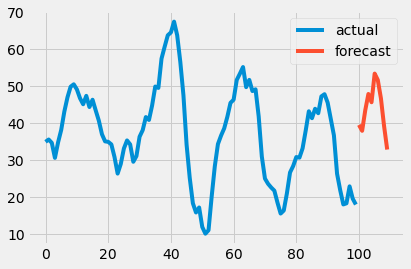

In [40]:
chart_df=pd.DataFrame(np.append(y_test[-100:], final_forecast).reshape(100+10,-1))
chart_df.iloc[:100,1].plot(label='actual')
chart_df.iloc[100:,1].plot(label='forecast')
plt.legend()
plt.show()

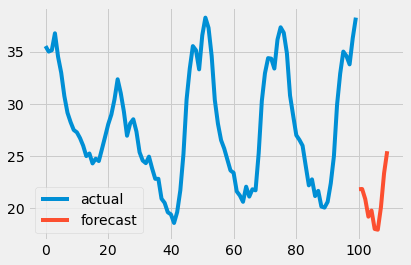

In [42]:
chart_df.iloc[:100,0].plot(label='actual')
chart_df.iloc[100:,0].plot(label='forecast')
plt.legend()
plt.show()

In [139]:
y_test[-100:]

array([[21.0250001 , 36.92499924],
       [22.82499981, 32.95000076],
       [24.        , 30.32499981],
       [22.625     , 33.22500038],
       [22.4749999 , 32.92500019],
       [21.49999952, 33.8499999 ],
       [21.39999962, 36.42499924],
       [19.95000029, 38.92500019],
       [17.79999971, 45.17499924],
       [16.2750001 , 47.30000019],
       [16.29999971, 44.82499981],
       [15.57500005, 47.07499981],
       [15.12500024, 47.64999962],
       [15.05000019, 44.52499962],
       [14.62500024, 42.95000076],
       [14.4749999 , 43.70000076],
       [13.59999975, 46.73333359],
       [13.67499995, 48.82500076],
       [13.4749999 , 50.60000038],
       [13.7249999 , 47.42499924],
       [13.70000005, 45.85000038],
       [16.07500052, 41.00000095],
       [16.12499976, 41.54999924],
       [16.45000029, 40.77499962],
       [18.92500019, 33.77500105],
       [19.17500019, 29.4749999 ],
       [19.92500019, 26.29999971],
       [19.19999981, 26.95000029],
       [19.375     ,